In [308]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

import pickle

In [309]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")

In [310]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [311]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [312]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [313]:
le = LabelEncoder()
df1 = le.fit_transform(df['Country'])
df2 = le.fit_transform(df['Region'])
pd.Series(df1,df2)

9    135
9     58
9     37
9    105
5     24
    ... 
8    118
8     13
4    136
8     21
8    141
Length: 158, dtype: int32

In [314]:
df["Country"]=df1
df["Region"]=df2

In [222]:
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


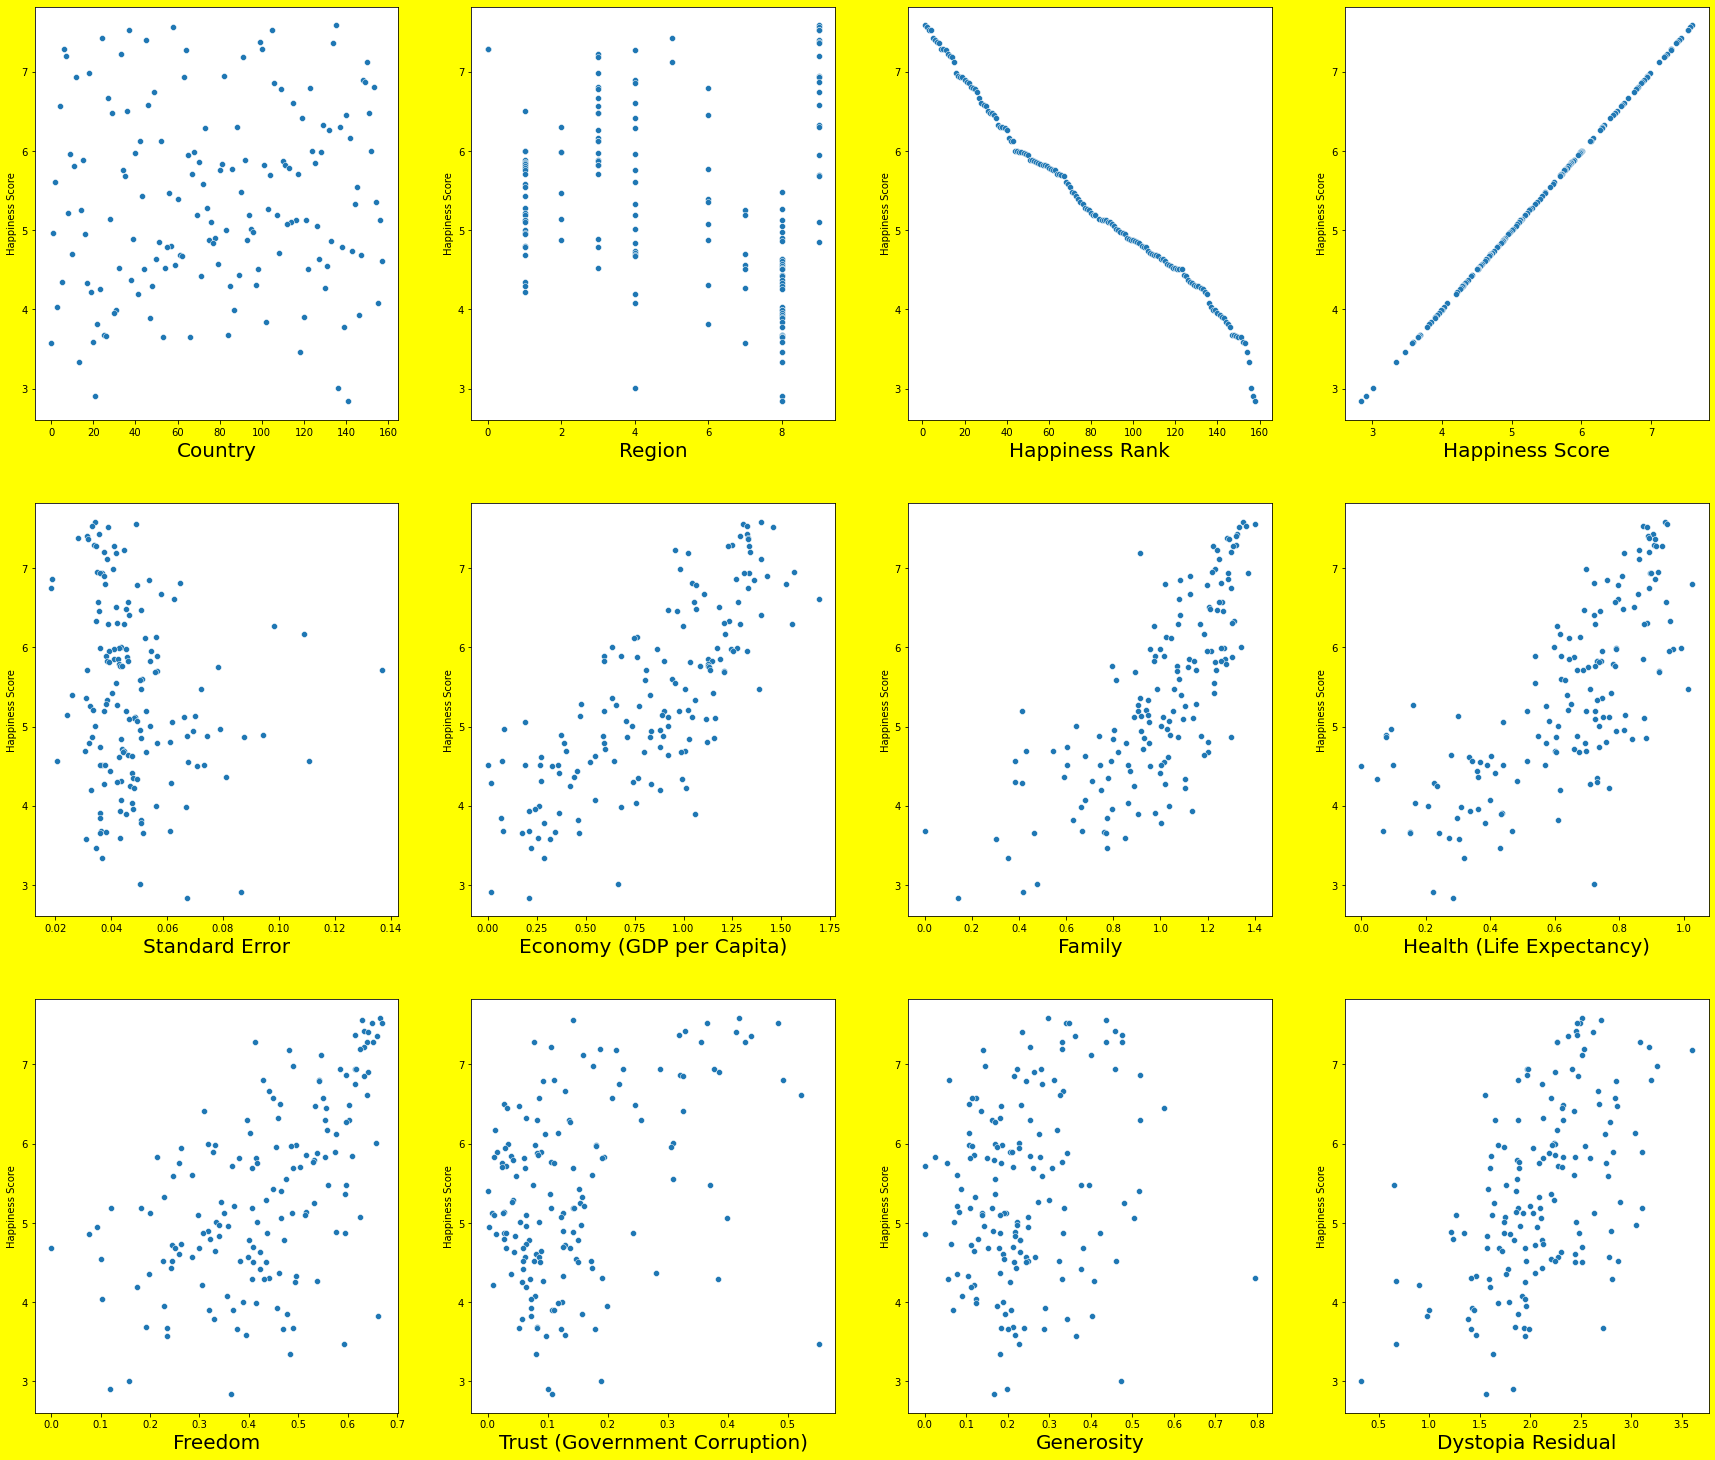

In [315]:
plt.figure(figsize=(30,35),facecolor='yellow')
plotnumber=1

for column in df:
    if plotnumber<13:
        plt.subplot(4,4,plotnumber)
        sns.scatterplot(x=df[column],y="Happiness Score",data=df)
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

Correlation

In [316]:
df.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


<AxesSubplot:>

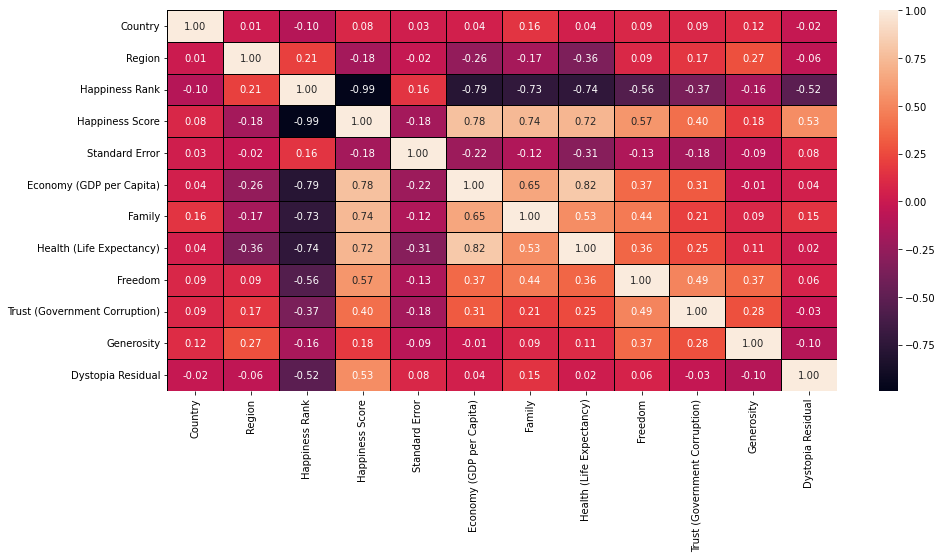

In [317]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, linecolor="black", fmt=".2f")

Outcome of Correlation

Most of the columns are positively correlated with the target column

Economy has 78% correlation with the target column which can be considered as strong bond,Family has 74% correlation with the target column which can be considered as strong bond,Health has 72% correlation with the target column which can be considered as strong bond,Freedom has 57% correlation with the target column which can be considered as good bond,Trust has 40% correlation with the target column which can be considered as good bond,Generosity has 18% correlation with the target column which can be considered as weak bond and Dystopia Residual has 53% correlation with the target column which can be considered as good bond.

Max correlation : Economy,
Min correlation : Generosity







In [318]:
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


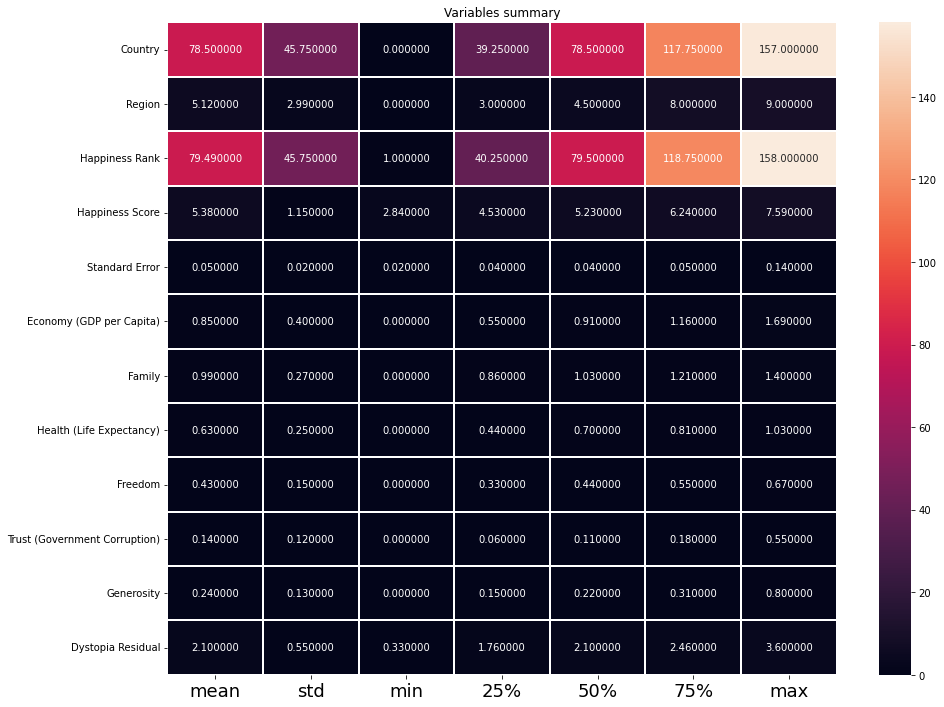

In [319]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.title("Variables summary")
plt.show()

Outcome of the describe of datasets

From the above plotting we are determining mean,standard deviation,min and max of each column.It helps us further in data cleaning.

Total number of rows and columns in the datasets<br>
1.158 rows<br>
2.10 columns<br>

Happiness Rank :<br>
1.mean=79.493671<br>
2.std=45.754363<br>
3.max=158.000000<br>
4.min=1.000000<br>

Standard Error:<br>
1.mean=0.047885<br>
2.std=0.017146<br>
3.max=0.136930<br>
4.min=0.018480<br>

Economy:<br>
1.mean=0.846137<br>
2.std=0.403121<br>
3.max=1.690420<br>
4.min=0.000000<br>

Family:<br>
1.mean=0.991046<br>
2.std=0.272369<br>
3.max=1.402230<br>
4.min=0.000000<br>

Health:<br>
1.mean=0.630259<br>
2.std=0.247078<br>
3.max=1.025250<br>
4.min=0.000000<br>

Freedom:<br>
1.mean=0.428615<br>
2.std=0.150693<br>
3.max=0.669730<br>
4.min=0.000000<br>

Trust:<br>
1.mean=0.143422<br>
2.std=0.120034<br>
3.max=0.551910<br>
4.min=0.000000<br>

Generosity:<br>
1.mean=0.237296<br>
2.std=0.126685<br>
3.max=0.795880<br>
4.min=0.000000<br>

Dystopia Residual:<br>
1.mean=2.098977<br>
2.std=0.553550<br>
3.max=3.602140<br>
4.min=0.328580<br>

Outcome : This comes under binary categorical data, so describe shows no valid outcome.

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    int32  
 1   Region                         158 non-null    int32  
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int32(2), int64(1)
memory usage: 13

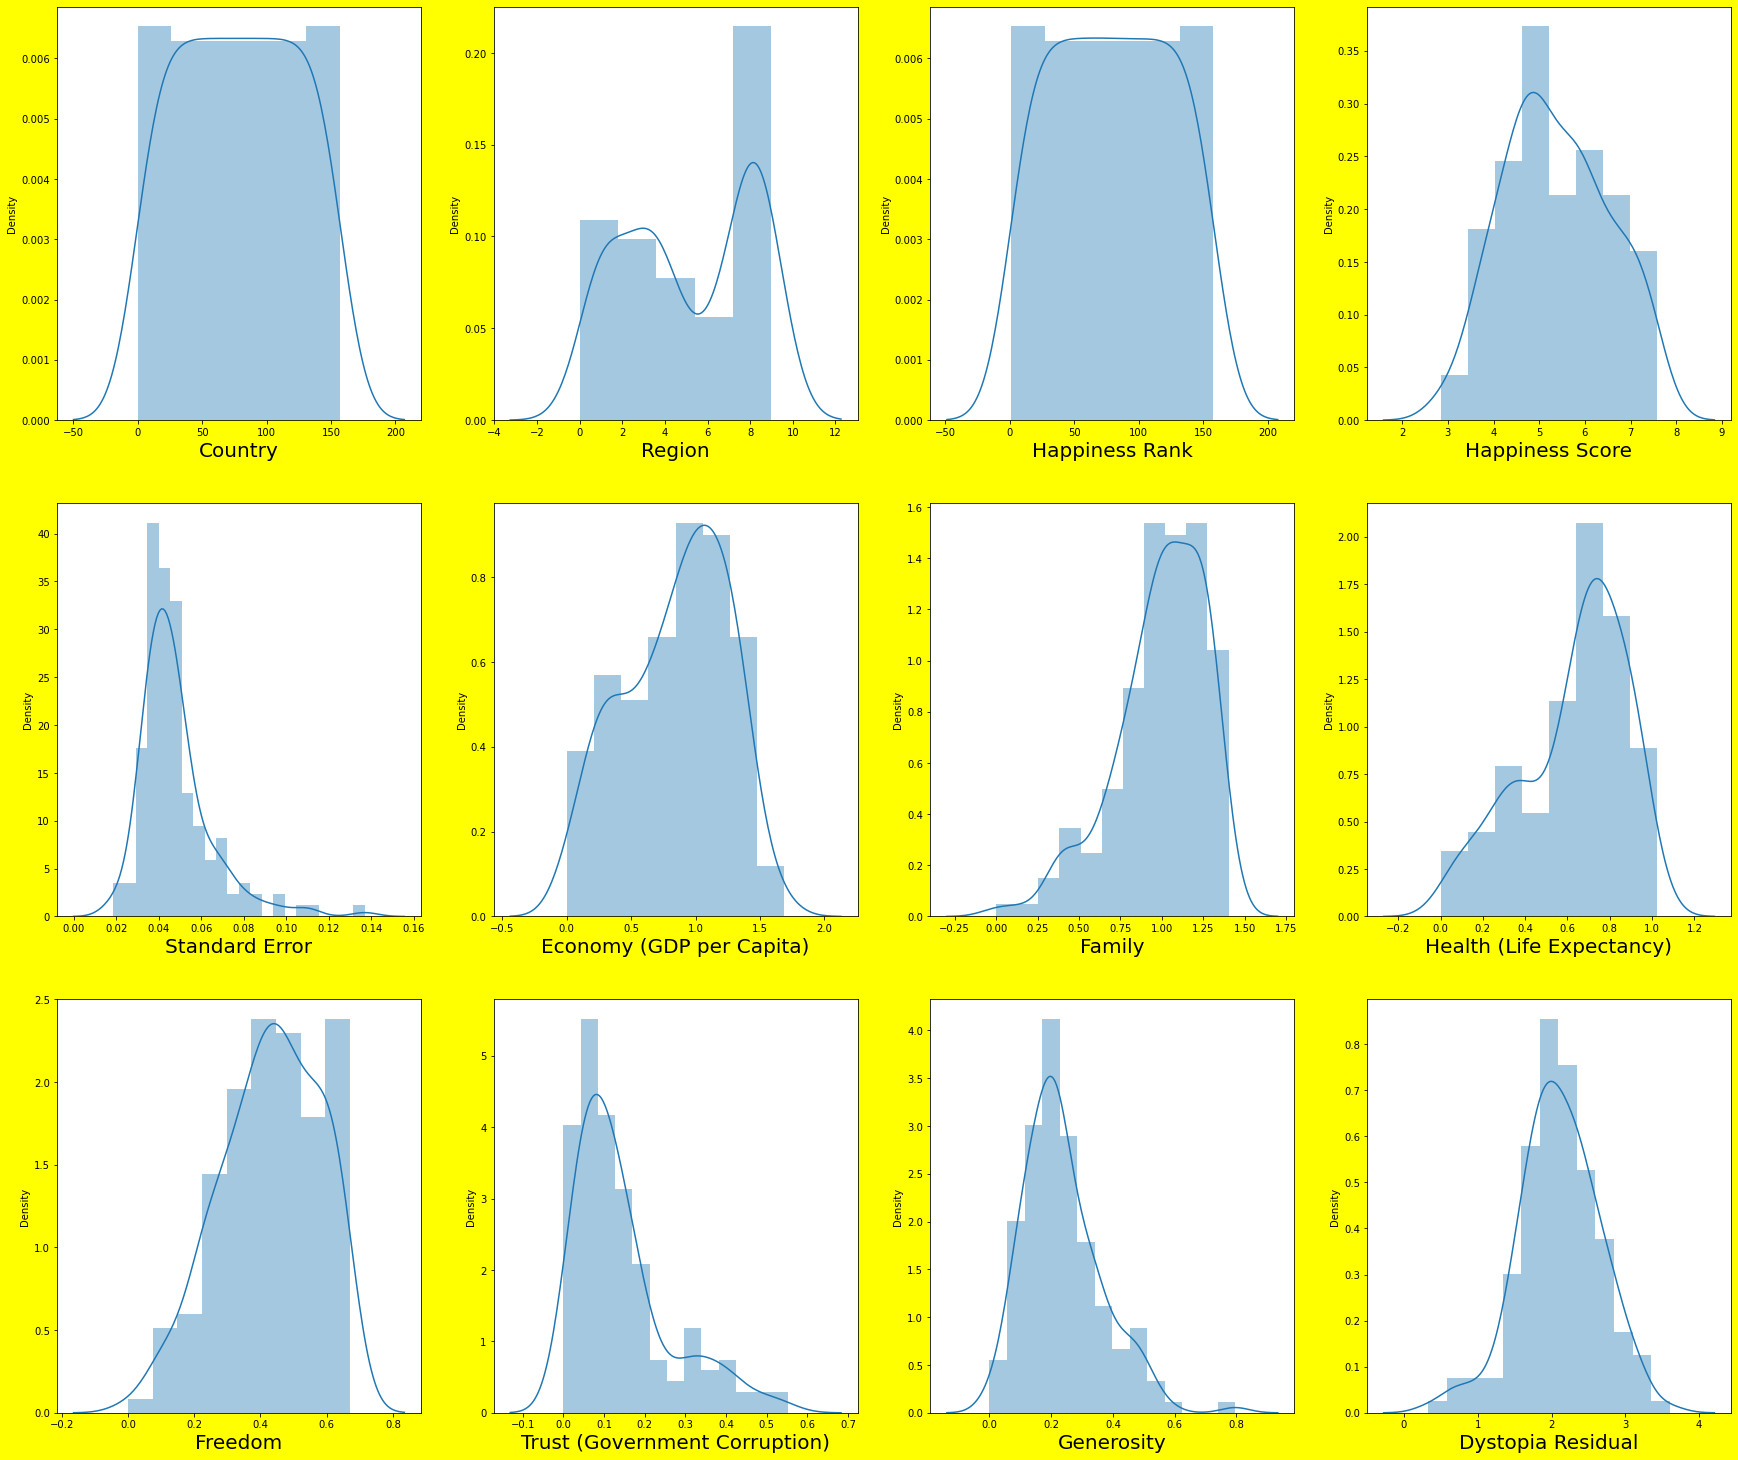

In [321]:
plt.figure(figsize=(30,35),facecolor='yellow')
plotnumber=1

for column in df:
    if plotnumber<=13:
        plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

Outliers checking :

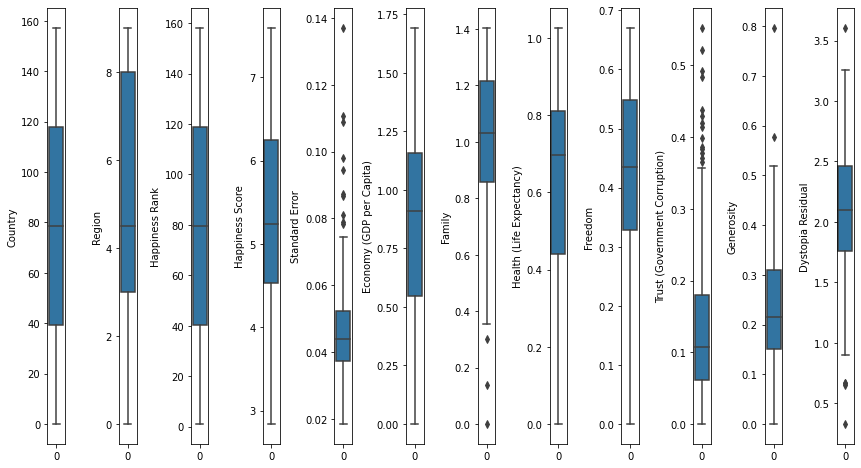

In [322]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,12):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]])
    plt.ylabel(collist[i],fontsize=10)
    plt.tight_layout()

From the above outcome we can see that columns['Standard Error','Trust(Government Corruption)'] has more outliers,columns['Happiness Rank','Happiness Score','Economy','Health','Freedom'] has no outliers and columns['Family','Generosity','Dystopia Residual'] has less outliers

Skewness:

In [323]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Outcome of the skewness: Skewness thrshold is taken as -0.5 to +0.5.Columns which are having skewness are:<br>
Standard Error<br>
Family<br>
Trust<br>
Generosity<br>
Dystopia Residual

In [324]:
df.rename(columns = {'Trust (Government Corruption)':'Trust','Dystopia Residual':'Dystopia_Residual'}, inplace = True)
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust,Generosity,Dystopia_Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [325]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1

In [330]:
f_low = (q1.Family-(1.5*iqr.Family))
print(f_low)
index = np.where(df['Family'] < f_low)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

0.32044875000000017
(139, 12)


,index,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust,Generosity,Dystopia_Residual
0,1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
1,4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
2,6,99,9,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
3,9,6,0,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
4,10,64,4,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,149,53,8,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
135,150,66,8,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
136,151,20,8,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
137,154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [339]:
t_high = (q3.Trust+(1.5*iqr.Trust))
print(t_high)
index = np.where(df['Trust'] > t_high)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

0.35812499999999997
(136, 12)


,index,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust,Generosity,Dystopia_Residual
0,1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
1,4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
2,6,99,9,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
3,9,6,0,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
4,10,64,4,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,149,53,8,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
132,150,66,8,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
133,151,20,8,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
134,154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [332]:
g_high = (q3.Generosity+(1.5*iqr.Generosity))
print(g_high)
index = np.where(df['Generosity'] > g_high)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

0.5488775
(137, 12)


,index,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust,Generosity,Dystopia_Residual
0,1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
1,4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
2,6,99,9,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
3,9,6,0,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
4,10,64,4,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,149,53,8,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
133,150,66,8,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
134,151,20,8,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
135,154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [334]:
dr_low = (q1.Dystopia_Residual-(1.5*iqr.Dystopia_Residual))
print(dr_low)
index = np.where(df['Dystopia_Residual'] < dr_low)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

0.7049024999999998
(137, 12)


,index,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust,Generosity,Dystopia_Residual
0,1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
1,4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
2,6,99,9,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
3,9,6,0,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
4,10,64,4,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,149,53,8,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
133,150,66,8,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
134,151,20,8,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
135,154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [336]:
dr_high = (q3.Dystopia_Residual+(1.5*iqr.Dystopia_Residual))
print(dr_high)
index = np.where(df['Dystopia_Residual'] > dr_high)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

3.5169225
(136, 12)


,index,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust,Generosity,Dystopia_Residual
0,1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
1,4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
2,6,99,9,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
3,9,6,0,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
4,10,64,4,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,149,53,8,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
132,150,66,8,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
133,151,20,8,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
134,154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


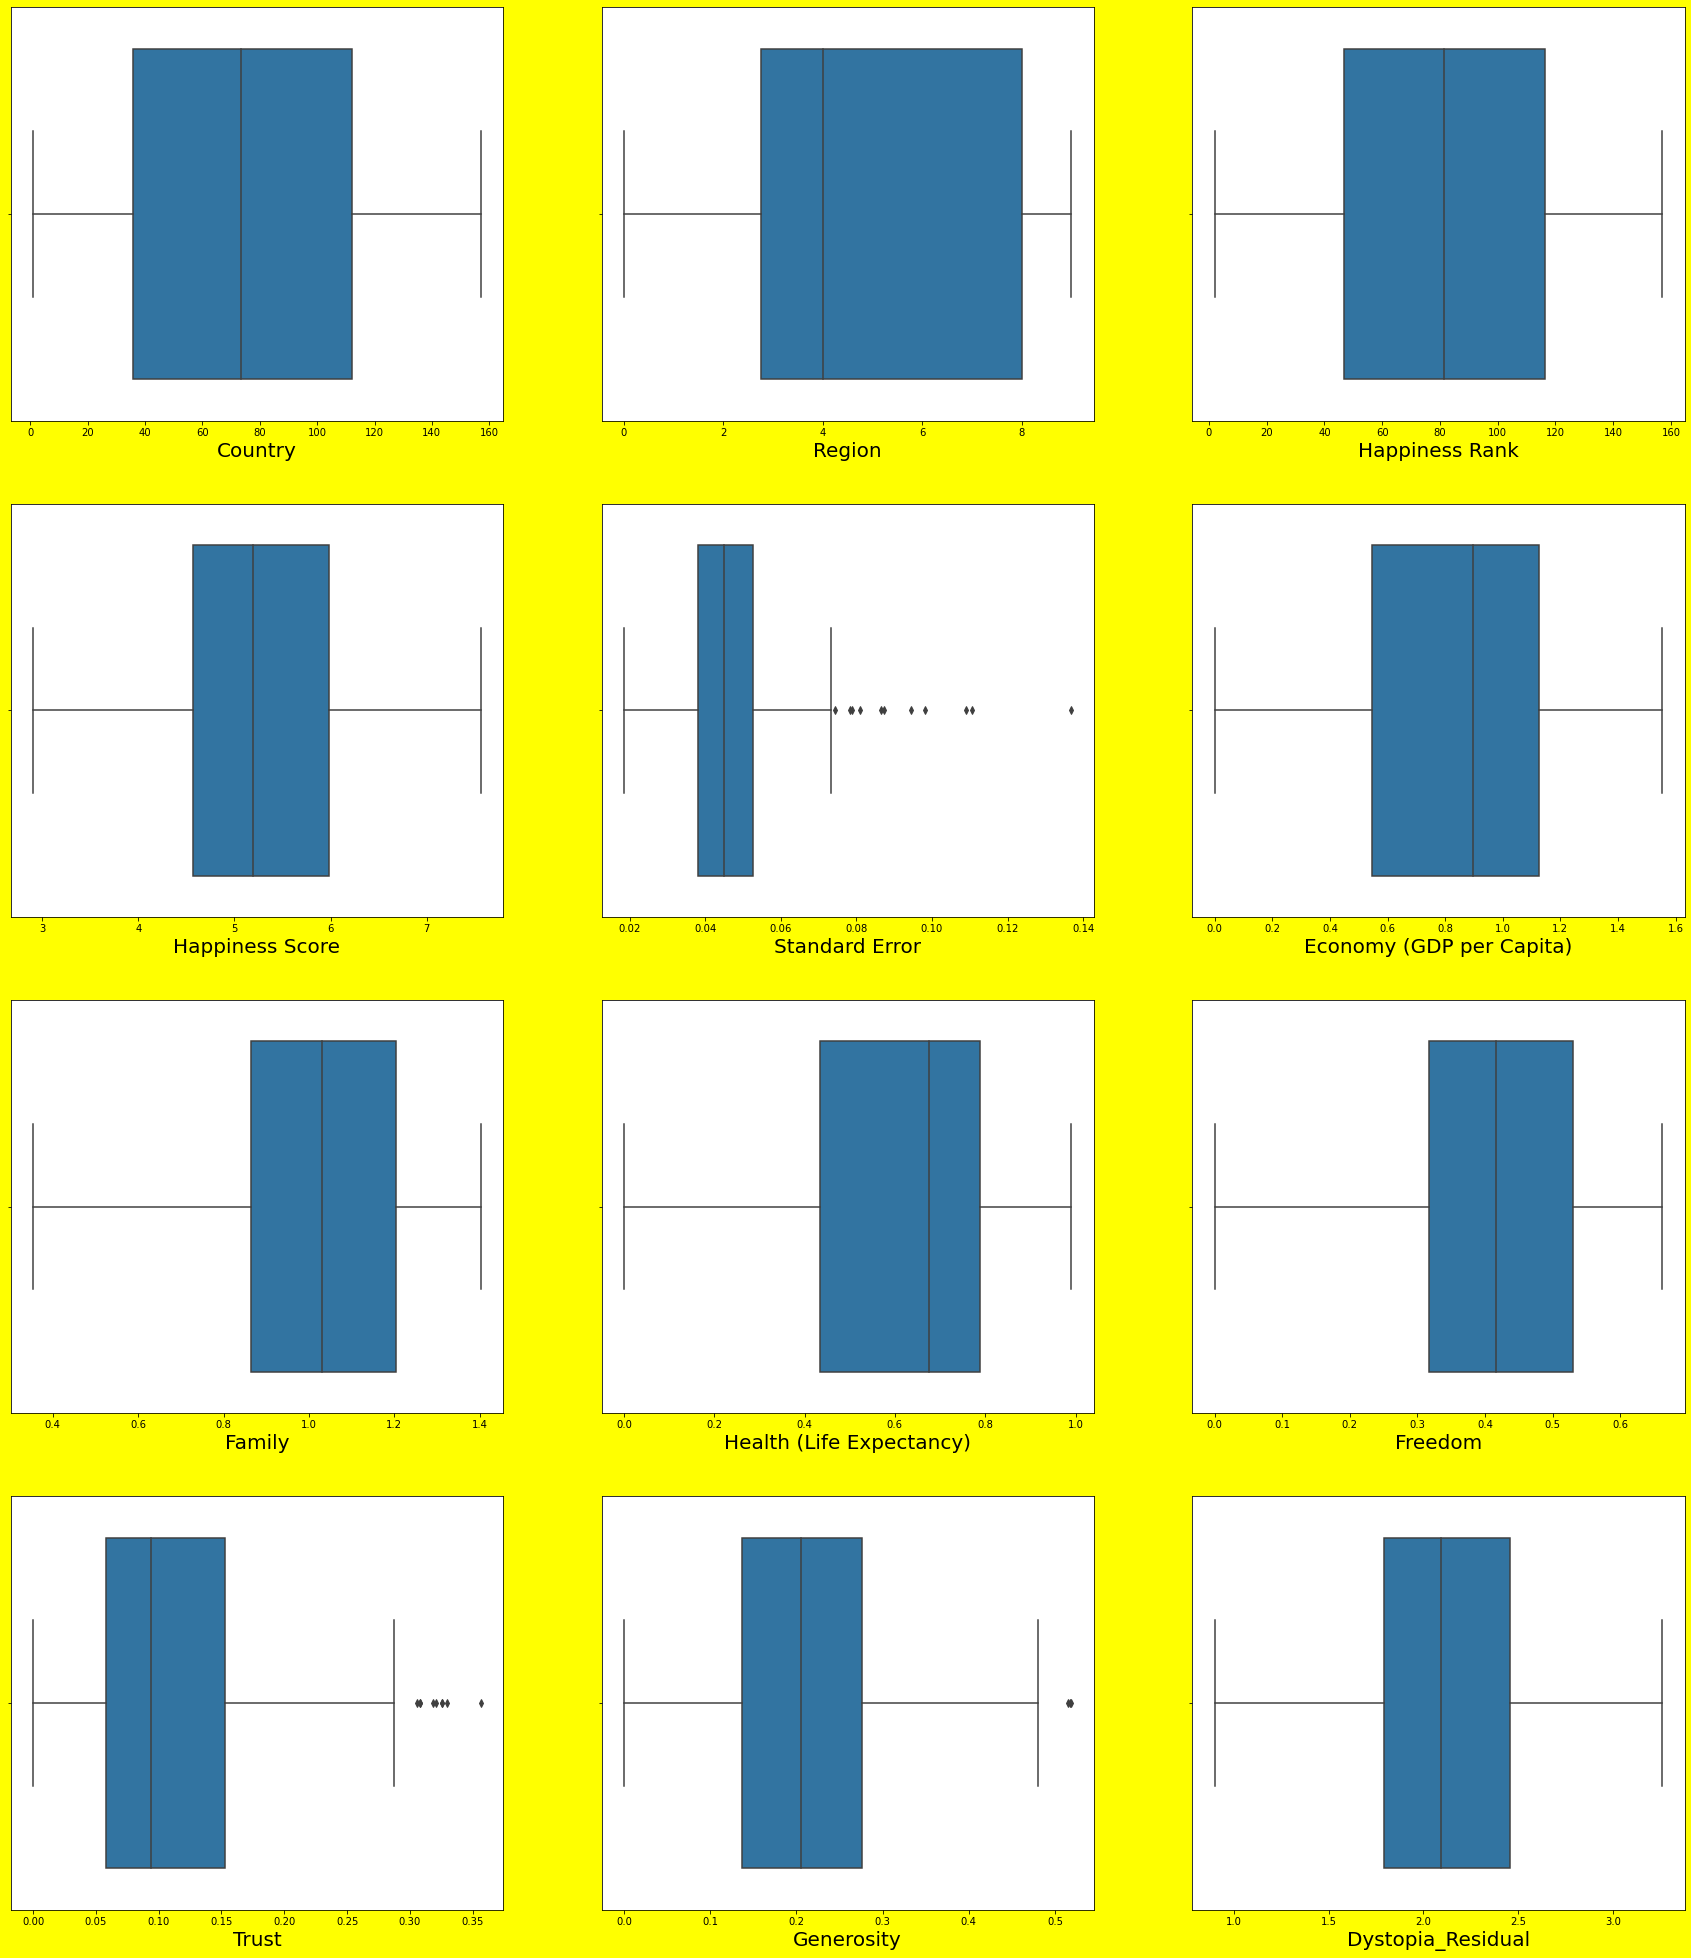

In [340]:
plt.figure(figsize=(30,35),facecolor='yellow')
plotnumber=1

for column in df:
    if plotnumber<=12:
        plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

Data Cleaning:

In [341]:
df=df.drop(['Happiness Rank','Standard Error'],axis=1)

In [342]:
df

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust,Generosity,Dystopia_Residual
1,58,9,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
4,24,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
6,99,9,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
9,6,0,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
10,64,4,7.278,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
...,...,...,...,...,...,...,...,...,...,...
149,53,8,3.656,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,66,8,3.655,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,8,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
154,13,8,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


Removing outliers :

Z-score technique :

In [343]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(136, 10)

In [344]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [345]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(136, 10)
(136, 10)


In [346]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.26228806,  1.28367245,  2.22260189, ...,  1.79875899,
         0.82854193,  2.03391213],
       [-0.12786623, -0.19643897,  1.98464011, ...,  0.03191165,
        -0.23925669,  1.22808983],
       [-0.88298222, -0.56025212,  1.94033495, ...,  1.84411097,
         0.26660526,  0.54571072],
       ...,
       [-1.26800657,  1.01891781, -1.77919881, ..., -0.10089523,
         0.63119285,  0.17903349],
       [-1.50927944,  1.01891781, -2.09477636, ...,  0.5753613 ,
        -0.19624843, -0.18409836],
       [-1.23595454,  1.01891781, -2.68065341, ..., -1.80854482,
         0.1770157 , -0.02859271]])

In [347]:
lr = LogisticRegression()
from sklearn.metrics import accuracy_score

Splitting the dataframe :

In [348]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.25)

In [349]:
lr.fit(x_train,y_train)

ValueError: Unknown label type: 'continuous'

In [350]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.25)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random state",i,"The model perfoms very well")
        print("At Random state :-",i)
        print("Training accuracy is :-",accuracy_score(y_train,pred_train)*100)
        print("Testing r2_score is :-",accuracy_score(y_test,pred_test)*100)

ValueError: Unknown label type: 'continuous'

So linear model's LogisticRegression does not fit for this data

In [351]:
lrg = LinearRegression()
lrg.fit(x_train,y_train)

LinearRegression()

In [352]:
df.tail(2)

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust,Generosity,Dystopia_Residual
154,13,8,3.340,0.28665,0.35386,0.31910,0.4845,0.08010,0.18260,1.63328
156,21,8,2.905,0.01530,0.41587,0.22396,0.1185,0.10062,0.19727,1.83302


Saving the model :

In [353]:
import pickle
file_name = "LinearRegression_model.pickle"
pickle.dump(lrg, open(file_name, 'wb'))

In [354]:
lrg.score(x_test,y_test)

0.930906907504904

In [359]:
y_pred = lrg.predict(x_test)
y_pred

array([2.01744685, 3.10677971, 2.11372632, 2.03555482, 1.7872437 ,
       2.47388246, 1.97003737, 2.41340215, 1.98006868, 3.07603794,
       3.04555685, 2.82670496, 2.54714254, 2.15267144, 1.73645528,
       2.72700594, 2.40224494, 2.20226312, 2.06497131, 2.08599825,
       1.81879117, 1.95433354, 2.00911457, 2.1066577 , 1.76786958,
       2.12501857, 1.83889999, 2.48004389, 2.12042199, 2.86001409,
       2.73929823])

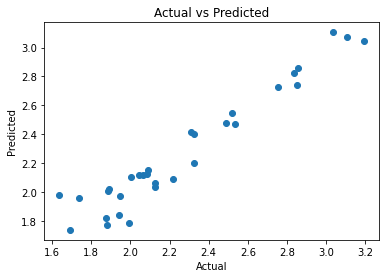

In [361]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()